In [ ]:
#Importação das bibliotecas
import numpy as np
import itertools
import pandas as panda
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, export_graphviz,export_text
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from IPython.display import Image 

In [ ]:
#Instalando os dataframes(Pandas)
!pip install wget
!wget https://raw.githubusercontent.com/diogocortiz/Curso-IA-para-todos/master/ArvoreDecis%C3%A3o/dataset_einstein.csv


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
--2022-10-24 11:55:08--  https://raw.githubusercontent.com/diogocortiz/Curso-IA-para-todos/master/ArvoreDecis%C3%A3o/dataset_einstein.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248868 (243K) [text/plain]
Saving to: ‘dataset_einstein.csv.1’

dataset_einstein.cs 100%[===================>] 243.04K  --.-KB/s    in 0.004s  

2022-10-24 11:55:08 (57.5 MB/s) - ‘dataset_einstein.csv.1’ saved [248868/248868]



In [ ]:
#Importando Dataset(Pandas)
dataframe = panda.read_csv("dataset_einstein.csv", delimiter=';')

#Mostrando as primeiras 10 colunas
print(dataframe.head(10))


        Patient ID  Patient age quantile SARS-Cov-2 exam result  \
0  44477f75e8169d2                    13               negative   
1  126e9dd13932f68                    17               negative   
2  a46b4402a0e5696                     8               negative   
3  f7d619a94f97c45                     5               negative   
4  d9e41465789c2b5                    15               negative   
5  75f16746216c4d1                     9               negative   
6  2a2245e360808d7                    13               negative   
7  509197ec73f1400                    16               negative   
8  8bb9d64f0215244                     1               negative   
9  5f1ed301375586c                    17               negative   

   Patient addmited to regular ward (1=yes. 0=no)  \
0                                               0   
1                                               0   
2                                               0   
3                                               0 

In [ ]:
count_row = dataframe.shape[0] #Pegando os números de registros
count_col = dataframe.shape[1] #Pegando os números de colunas

print(count_row)
print(count_col)

5644
11


In [ ]:
#Removendo registros que os campos estão em branco
dataframe = dataframe.dropna()
print(dataframe.head(10))

print('Quantidade de campos(colunas): ', dataframe.shape[1])
print('Total de registros:', dataframe.shape[0])


         Patient ID  Patient age quantile SARS-Cov-2 exam result  \
1   126e9dd13932f68                    17               negative   
8   8bb9d64f0215244                     1               negative   
28  fc41531ca4faf1e                    13               negative   
29  891d0f6449ff3d7                    14               negative   
30  ebdd7c67fcb21b4                     9               negative   
38  826f654dbf80245                    16               negative   
50  11e4956b770f080                    17               negative   
51  7feee6750421bec                     7               negative   
55  ac357896cbf35fc                    19               negative   
59  dde616ba4d00c83                    10               negative   

    Patient addmited to regular ward (1=yes. 0=no)  \
1                                                0   
8                                                0   
28                                               0   
29                                 

In [ ]:
#Verificar se os dados estão balanceados ou desbalanceados
print ('Total de registros negativos: ', dataframe[dataframe['SARS-Cov-2 exam result'] =='negative'].shape[0])
print ('Total de registros positivos: ', dataframe[dataframe['SARS-Cov-2 exam result'] =='positive'].shape[0])

Total de registros negativos:  302
Total de registros positivos:  55


In [ ]:
# VAMOS JOGAR AS ETIQUETAS PARA Y
y = dataframe['SARS-Cov-2 exam result'].values 
print(y)

# X SERÁ A NOSSA MATRIZ COM AS FEATURES
# VAMOS PEGAR OS CAMPOS DE TREINAMENTO (Hemoglobin, Leukocytes, Basophils, Proteina C reativa mg/dL)

x = dataframe[['Hemoglobin', 'Leukocytes', 'Basophils','Proteina C reativa mg/dL']].values

# VAMOS MOSTRAR X 
print(x)

['negative' 'negative' 'negative' 'negative' 'negative' 'negative'
 'negative' 'negative' 'negative' 'negative' 'negative' 'negative'
 'negative' 'negative' 'negative' 'negative' 'negative' 'negative'
 'negative' 'negative' 'negative' 'negative' 'negative' 'negative'
 'negative' 'negative' 'negative' 'negative' 'negative' 'negative'
 'negative' 'negative' 'negative' 'negative' 'negative' 'negative'
 'negative' 'negative' 'negative' 'negative' 'negative' 'negative'
 'negative' 'negative' 'negative' 'negative' 'negative' 'negative'
 'negative' 'negative' 'negative' 'negative' 'negative' 'negative'
 'negative' 'negative' 'negative' 'negative' 'negative' 'negative'
 'negative' 'negative' 'negative' 'negative' 'negative' 'negative'
 'negative' 'negative' 'negative' 'negative' 'negative' 'negative'
 'negative' 'negative' 'negative' 'negative' 'negative' 'negative'
 'negative' 'negative' 'negative' 'negative' 'negative' 'negative'
 'negative' 'negative' 'negative' 'positive' 'negative' 'negat

In [ ]:
x_treino,x_teste,y_treino,y_teste = train_test_split(x,y,train_size = 0.2,random_state=3)



In [ ]:
# CRIAR UM ALGORTIMO QUE SERÁ DO TIPO DE ÁRVORE DE DECISÃO

algortimo_arvore = DecisionTreeClassifier(criterion='entropy', max_depth=5)
# AGORA EM MINHA_ARVORE EU TENHO ASSOCIADA A ELA O ALGORITMO DE TREINAMENTO, 
# BASICAMENTE A RECEITA QUE VIMOS NA PARTE TÉORICA. 
#AGORA PRECISAMOS TREINÁ-LA
modelo = algortimo_arvore.fit(x_treino, y_treino)

[0.25222472 0.51491912 0.15560699 0.07724917]


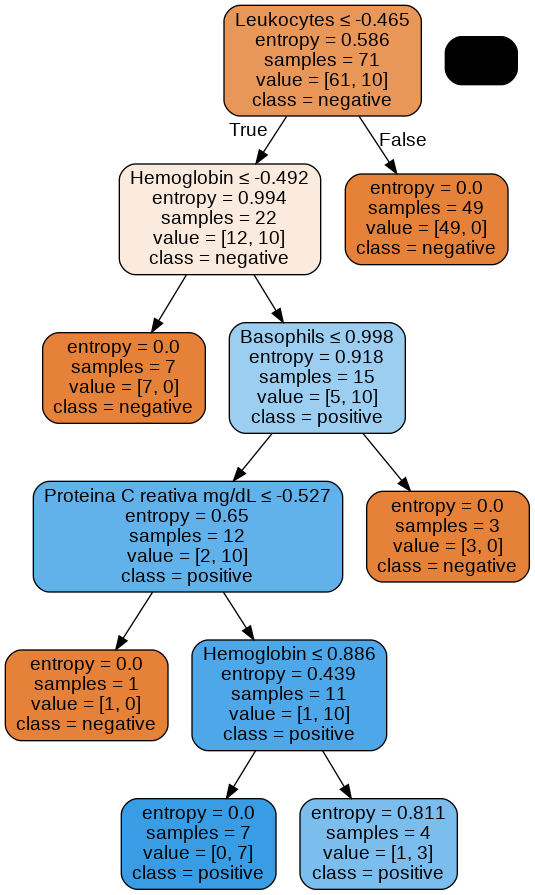

In [ ]:
#PODEMOS MOSTRAR A FEATURE MAIS IMPORTANTE (WHITE BOX?)
print (modelo.feature_importances_)


nome_features = ['Hemoglobin', 'Leukocytes', 'Basophils','Proteina C reativa mg/dL']
nome_classes = modelo.classes_

# MONTAR A IMAGEM DA ÁRVORE
dot_data = StringIO()
#dot_data = tree.export_graphviz(my_tree_one, out_file=None, feature_names=featureNames)
export_graphviz(modelo, out_file=dot_data, filled=True, feature_names=nome_features, class_names=nome_classes, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())
graph.write_png("arvore.png")
Image('arvore.png')
#Indice das features
# 0 - 'Hemoglobin', 
# 1 - 'Leukocytes'
# 2 - 'Basophils',
# 3 - 'Proteina C reativa mg/dL']

Ranking da feature:
1. feature 1 (0.514919)
2. feature 0 (0.252225)
3. feature 2 (0.155607)
4. feature 3 (0.077249)


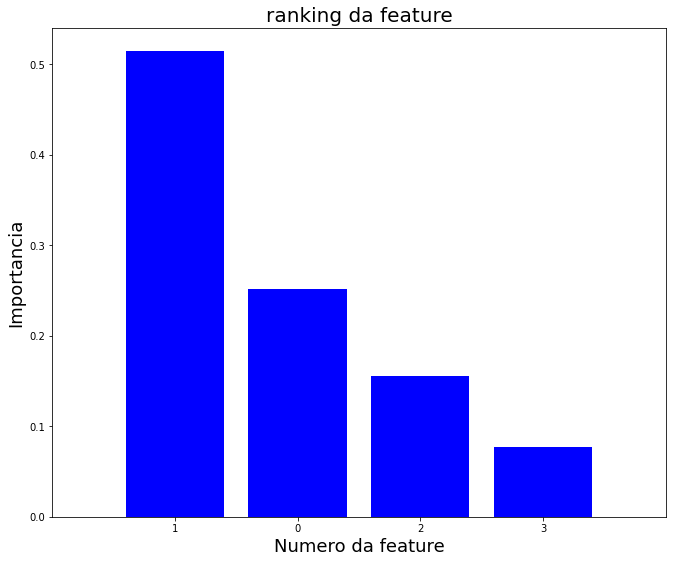

In [ ]:
importances = modelo.feature_importances_
indices = np.argsort(importances)[::-1]
print("Ranking da feature:")

for f in range(x.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))
f, ax = plt.subplots(figsize=(11, 9))
plt.title("ranking da feature", fontsize = 20)
plt.bar(range(x.shape[1]), importances[indices],
    color="b", 
    align="center")
plt.xticks(range(x.shape[1]), indices)
plt.xlim([-1, x.shape[1]])
plt.ylabel("Importancia", fontsize = 18)
plt.xlabel("Numero da feature", fontsize = 18)
plt.show()
#Indice das features
# 0 - 'Hemoglobin', 
# 1 - 'Leukocytes'
# 2 - 'Basophils',
# 3 - 'Proteina C reativa mg/dL']

In [ ]:
# APLICANDO O MODELO NA BASE DE TESTES E ARMAZENDO O RESULTADO EM Y_PREDICOES
y_predicoes = modelo.predict(x_teste)

#AVALIAÇÃO DO MODELO 
#VAMOS AVALIAR O VALOR REAL DO DATASET Y_TESTE COM AS PREDIÇÕES
print("ACURÁCIA DA ÁRVORE: ", accuracy_score(y_teste, y_predicoes))
print (classification_report(y_teste, y_predicoes))

# PRECISÃO: DAS CLASSIFICAÇÕES QUE O MODELO FEZ PARA UMA DETERMINADA CLASSE
# RECALL: DOS POSSÍVEIS DATAPOINTS PERTECENTES A UMA DETERMINADA CLASSE

ACURÁCIA DA ÁRVORE:  0.7972027972027972
              precision    recall  f1-score   support

    negative       0.91      0.85      0.88       241
    positive       0.39      0.53      0.45        45

    accuracy                           0.80       286
   macro avg       0.65      0.69      0.66       286
weighted avg       0.83      0.80      0.81       286



Matriz de Confusão sem normalizacão 
[[204  37]
 [ 21  24]]


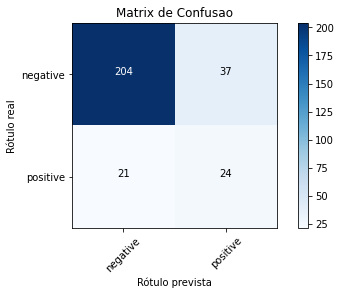

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Matriz de Confusão Normalizada")
    else:
        print('Matriz de Confusão sem normalizacão ')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Rótulo real')
    plt.xlabel('Rótulo prevista')

matrix_confusao = confusion_matrix(y_teste, y_predicoes)
plt.figure()
plot_confusion_matrix(matrix_confusao, classes=nome_classes,
                      title='Matrix de Confusao')

In [ ]:
#Procurar Dados na Árvore de decisão
dados = []

dados.append(float(input("Digite a Hemoglobina do paciente\n"))) 
dados.append(float(input("Digite os Leucócitos do paciente\n")))
dados.append(float(input("Digite o basófilo do paciente\n")))
dados.append(float(input("Digite a proteina C do paciente\n")))

resultado =  modelo.predict([dados])

if resultado == ['negative']:
    print('O paciente deu negativo para Covid-19')
else:
    print('O paciente deu positivo para Covid-19')






Digite a Hemoglobina do paciente
0.5
Digite os Leucócitos do paciente
0.5
Digite o basófilo do paciente
0.5
Digite a proteina C do paciente
0.5
O paciente deu negativo para Covid-19
